In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
# Set parameters.
nx = 41  # number of points in the x direction
ny = 41  # number of points in the y direction
xmin, xmax = 0.0, 1.0  # domain limits in the x direction
ymin, ymax = -0.5, 0.5  # domain limits in the y direction
Lx = (xmax - xmin)  # domain length in the x direction
Ly = (ymax - ymin)  # domain length in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction

# Create the gridline locations.
x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)

In [4]:
def poisson_source(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x,y)
    b = (-2.0*numpy.pi/Lx*numpy.pi/Ly*
        numpy.sin(numpy.pi*X/Lx)*
        numpy.cos(numpy.pi*Y/Ly))
    return b

In [5]:
def l2_norm(p, p_ref):
    l2_diff = (numpy.sqrt(numpy.sum((p-p_ref)**2))/
              numpy.sqrt(numpy.sum(p_ref**2)))
    return l2_diff

In [6]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    conv = [] # Convergence history
    diff = rtol + 1.0 # Initial difference
    ite = 0 # Iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:])*dy**2 + 
                          (pn[:-2, 1:-1] + pn[2:, 1:-1])*dx**2 - 
                         b[1:-1, 1:-1]*dx**2*dy**2)/
                        (2.0*(dx**2 + dy**2)))
        # Dirichlet BCs are automatically enforced
        # Compute and record the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [7]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [8]:
def plot_3d(x, y, u, label = '$z$', elev=30.0, azim=45.0):
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])

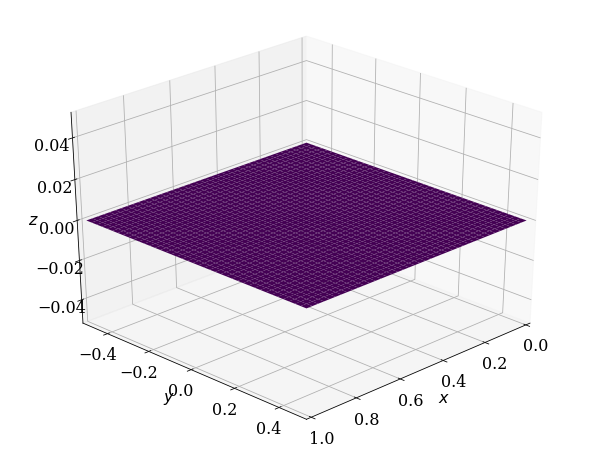

In [9]:
# Set the initial conditions.
p0 = numpy.zeros((ny,nx))

# Compute the source term
b = poisson_source(x, y, Lx, Ly)

# Plot the initial scalar field
plot_3d(x,y,p0)

In [10]:
# Compute the solution using Jacobi relaxation method.
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print(ites, conv[-1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


3125 1.9958631078740742e-07


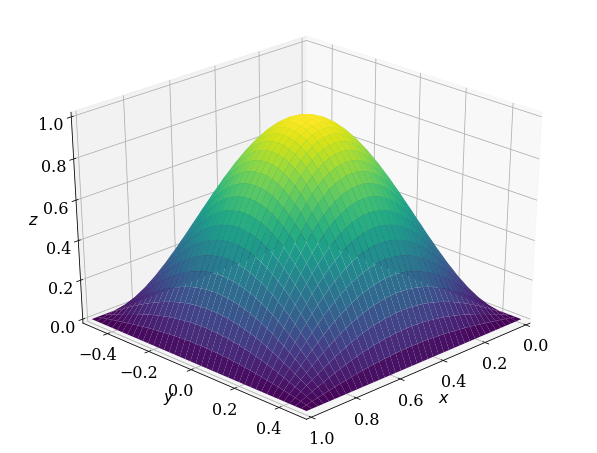

In [11]:
plot_3d(x, y, p)

In [12]:
def poisson_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    p = numpy.sin(numpy.pi*X/Lx)*numpy.cos(numpy.pi*Y/Ly)
    return p

In [13]:
# Cmopute the analytical solution
p_exact = poisson_solution(x, y, Lx, Ly)

In [14]:
# Compute the relative L2-norm of the error
l2_norm(p, p_exact)

0.00044962635351970283